In [1]:
# !pip install numpy tqdm pandas matplotlib

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from agente import AgenteQLearning
from ambiente import AmbienteDiezMil
from validador import Validador
from IPython.display import clear_output
from tqdm import tqdm
from utils import RangeSnaper
from diezmil import JuegoDiezMil
from jugador import JugadorFromPolicy

In [2]:
# Inicialización del gráfico
def train(epochs, episodios, alpha, gamma, epsilon, rs, early_stop = 20, seed = 42, recompensa_i: int = 0, penalidad_i: int = 0, multiplicador_recompensa: int = 1):   
    seed = seed
    np.random.seed(seed)

    ambiente = AmbienteDiezMil(rs=rs, recompensa_i=recompensa_i, penalidad_i=penalidad_i, multiplicador_recompensa=multiplicador_recompensa)

    # Crear un agente de Q-learning
    agente = AgenteQLearning(ambiente, alpha=alpha, gamma=gamma, epsilon=epsilon)


    best_validation = Validador(AmbienteDiezMil(rs=rs)).validar_politica(agente.q_table2pol(), 500)
    validacion = [best_validation]
    best_policy = None
    epochs_sin_mejora = 0
    # Entrenar al agente con un número de episodios
    for _ in tqdm(range(epochs)):
        agente.entrenar(episodios, verbose=False)
        if _ % 2 == 0:
            validador = Validador(AmbienteDiezMil(rs=rs, recompensa_i=recompensa_i, penalidad_i=penalidad_i, multiplicador_recompensa=multiplicador_recompensa))
            validacion.append(validador.validar_politica(agente.q_table2pol(), 300))
            if validacion[-1] < best_validation:
                best_validation = validacion[-1]
                best_policy = agente.q_table2pol()
                epochs_sin_mejora = 0
            else:
                epochs_sin_mejora += 1
                if epochs_sin_mejora == early_stop:
                    break
    
    return best_validation, best_policy, validacion

In [3]:
RANGOS1 = [
    (0, 1),
    (1, 250),
    (250, 500),
    (500, 750),
    (750, 1000),
    (1000, 2000),
    (2000, 5000),
    (5000, 10000),
    (10000, int(1e10)),
]

RANGOS2 = [
    (0, 1),
    (1, 50),
    (50, 100),
    (100, 150),
    (150, 200),
    (200, 250),
    (250, 350),
    (350, 500),
    (500, 750),
    (750, 1000),
    (1000, 2000),
    (2000, 5000),
    (5000, 10000),
    (10000, int(1e10)),
]

RANGOS3 = [
    (0, 1),
    (1, 50),
    (50, 100),
    (100, 150),
    (150, 200),
    (200, 250),
    (250, 350),
    (350, 500),
    (500, 750),
    (750, 1000),
    (1000, 2000),
    (2000, 4000),
    (4000, 6000),
    (6000, 8000),
    (8000, 10000),
    (10000, int(1e10)),
]

RANGOS4 = [
    (0, 1),
    (1, 250),
    (250, 500),
    (500, 750),
    (750, 1000),
    (1000, 5000),
    (5000, int(1e10)),
]

100%|██████████| 100/100 [00:29<00:00,  3.41it/s]


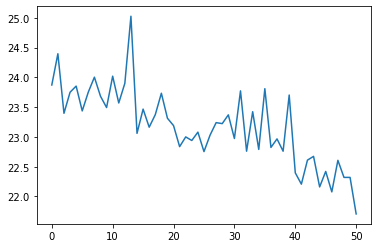

21.706666666666667


In [6]:
bv, bp, vn = train(100, 100, 0.01, 0.9, 0.1, RangeSnaper())
plt.plot(vn)
plt.show()
print(bv)

In [7]:
# For Rangos5, approximate the distribution of points per turn
points_per_turn = []
games = 10000
for i in tqdm(range(1, games)):
    ambiente = AmbienteDiezMil(rs=RangeSnaper())
    jugador = JugadorFromPolicy(bp, rs=RangeSnaper())
    juego = JuegoDiezMil(jugador)
    puntos_turno = list(juego.jugar(verbose=False))
    points_per_turn += puntos_turno

points_per_turn

100%|██████████| 9999/9999 [00:07<00:00, 1374.72it/s]


[25,
 10100,
 24,
 10100,
 16,
 10100,
 17,
 10000,
 19,
 11950,
 30,
 10350,
 33,
 10150,
 19,
 10000,
 21,
 10250,
 15,
 10100,
 34,
 10350,
 24,
 10600,
 20,
 13200,
 24,
 12600,
 27,
 10150,
 27,
 10600,
 13,
 11400,
 20,
 10350,
 26,
 10050,
 26,
 10100,
 17,
 10550,
 12,
 11250,
 16,
 10150,
 23,
 10300,
 28,
 10350,
 25,
 10100,
 13,
 10250,
 29,
 10200,
 30,
 10350,
 24,
 10100,
 37,
 10950,
 21,
 10000,
 26,
 10450,
 27,
 10500,
 28,
 10250,
 16,
 11250,
 24,
 10100,
 20,
 10650,
 19,
 10450,
 21,
 10350,
 15,
 10750,
 17,
 13600,
 23,
 10850,
 22,
 10550,
 20,
 10550,
 15,
 11600,
 25,
 10150,
 23,
 12700,
 20,
 10400,
 21,
 11150,
 22,
 10650,
 30,
 10700,
 18,
 10750,
 11,
 10500,
 24,
 10800,
 23,
 10950,
 28,
 11300,
 20,
 10100,
 22,
 10250,
 32,
 10950,
 26,
 13700,
 29,
 10150,
 25,
 12200,
 17,
 10400,
 19,
 11750,
 20,
 10000,
 21,
 10200,
 20,
 10050,
 31,
 10100,
 10,
 10400,
 26,
 10050,
 23,
 10150,
 21,
 10350,
 31,
 10100,
 28,
 10250,
 17,
 10000,
 26,
 10450,

[(0, 1),
 (17.0, 21.0),
 (21.0, 24.0),
 (24.0, 27.0),
 (27.0, 5023.5),
 (5023.5, 10100.0),
 (10100.0, 10200.0),
 (10200.0, 10450.0),
 (10450.0, 10950.0),
 (10950.0, 16950.0),
 (16950.0, 10000000000)]

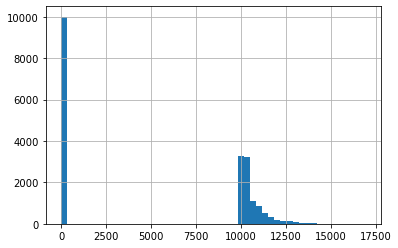

In [8]:
points_obs = pd.Series(points_per_turn)
points_obs.hist(bins=50)

# Quantiles for the distribution
RANGOS5 = [
    (0, 1),
] + [
    (points_obs.quantile(q), points_obs.quantile(q+0.1))
    for q in np.linspace(0.1, 0.9, 9)
] + [
    (points_obs.quantile(1), int(1e10))
]

RANGOS5

In [9]:
RANGOS5 = [
    (0, 1),
    (0.0, 150.0),
    (150.0, 250.0),
    (250.0, 250.0),
    (250.0, 300.0),
    (300.0, 350.0),
    (350.0, 500.0),
    (500.0, 650.0),
    (650.0, 1100.0),
    (1100.0, 10000.0),
    (10000.0, int(1e10)),
]

In [10]:
# RANGOS6 splits each of the previous ranges in n
n = 2
RANGOS6 = [RANGOS5[0]]
for r in RANGOS5[1:-1]:
    RANGOS6 += [
        (r[0] + i * (r[1] - r[0]) / n, r[0] + (i + 1) * (r[1] - r[0]) / n)
        for i in range(n)
    ]
RANGOS6[1] = (1, RANGOS6[1][1])
RANGOS6 += [RANGOS5[-1]]

RANGOS6

[(0, 1),
 (1, 75.0),
 (75.0, 150.0),
 (150.0, 200.0),
 (200.0, 250.0),
 (250.0, 250.0),
 (250.0, 250.0),
 (250.0, 275.0),
 (275.0, 300.0),
 (300.0, 325.0),
 (325.0, 350.0),
 (350.0, 425.0),
 (425.0, 500.0),
 (500.0, 575.0),
 (575.0, 650.0),
 (650.0, 875.0),
 (875.0, 1100.0),
 (1100.0, 5550.0),
 (5550.0, 10000.0),
 (10000.0, 10000000000)]

In [11]:
bv, bp, vn = train(100, 100, 0.1, 0.9, 0.1, RangeSnaper(RANGOS5))
bv

100%|██████████| 100/100 [00:31<00:00,  3.21it/s]


21.206666666666667

In [12]:
bv, bp, vn = train(100, 100, 0.1, 0.9, 0.1, RangeSnaper(RANGOS6))
bv

 58%|█████▊    | 58/100 [00:19<00:13,  3.01it/s]


21.34

In [ ]:
#hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

def objective(params):
    best_validation, best_policy, _ = train(epochs=500, episodios=1000, **params)
    
    return {
        "loss": best_validation,
        "status": STATUS_OK,
        "best_policy": best_policy
    }

space = {
    "alpha": hp.uniform("alpha", 0.0, 1.0),
    "gamma": hp.uniform("gamma", 0.0, 1.0),
    "epsilon": hp.uniform("epsilon", 0.01, 0.2),
    "rs": hp.choice("rango", [RangeSnaper(rs) for rs in [RANGOS1, RANGOS2, RANGOS4, RANGOS5, RANGOS6]]),
    "recompensa_i": hp.choice("recompensa_i", [0, 1, 2, 3, 5]),
    "penalidad_i": hp.choice("penalidad_i", [0, 1, 2, 3, 5]),
    "multiplicador_recompensa": hp.choice("multiplicador_recompensa", [0.5, 1, 2, 5, 10])

}

trials = Trials()
best = fmin(objective, space, algo=tpe.suggest, max_evals=200, trials=trials, verbose=1)
print(best)


In [ ]:
def getBestModelfromTrials(trials):
    valid_trial_list = [trial for trial in trials
                            if STATUS_OK == trial['result']['status']]
    losses = [ float(trial['result']['loss']) for trial in valid_trial_list]
    index_having_minumum_loss = np.argmin(losses)
    best_trial_obj = valid_trial_list[index_having_minumum_loss]
    return best_trial_obj['result']['best_policy']

best_policy = getBestModelfromTrials(trials)

In [ ]:
validador = Validador(AmbienteDiezMil(rs=RangeSnaper()))
(validador.validar_politica(best_policy, 300))
            

21.073333333333334

In [ ]:
bv, bp , _ =train(100, 1000, best["alpha"], best["gamma"], best["epsilon"], RangeSnaper())
validador = Validador(AmbienteDiezMil(rs=RangeSnaper()))
(validador.validar_politica(bp, 300)), bv 

(21.67, 21.14)